# Ejercicio 12

En el submódulo de riesgo de prima y reservas, determinados parámetros generales pueden sustituirse por parámetros específicos de la empresa (art. 218 del Reglamento Delegado), cumpliendo entre otros aspectos, las hipótesis previstas en el ANEXO XVII:

*Los datos se ajustarán a las siguientes hipótesis:
i. la siniestralidad agregada para un determinado segmento y año de accidente es linealmente proporcionalcon respecto a las primas devengadas en un determinado año de accidente;*

Se pide, para los siguientes datos, validar el cumplimiento de la anterior hipótesis:

| Dato | 2016 | 2017 | 2018 | 2019 | 2020 | 2021 | 2022 | 2023 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
Siniestralidad agregada | 461210 | 518830 | 574390 | 690200 | 706580 | 740550 | 763660 | 804950
Primas | 482880 | 546620 | 591390 | 690240 | 707440 | 751330 | 791320 | 848870


In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Siniestros = [461210, 518830, 574390, 690200, 706580, 740550, 763660, 804950]
Primas = [482880, 546620, 591390, 690240, 707440, 751330, 791320, 848870]

datos = pd.DataFrame(data=Siniestros, columns=['Siniestros'])
datos['Primas'] = Primas
print(datos)

   Siniestros  Primas
0      461210  482880
1      518830  546620
2      574390  591390
3      690200  690240
4      706580  707440
5      740550  751330
6      763660  791320
7      804950  848870


In [2]:
modelo = st.linregress(datos.Primas, datos.Siniestros)
print(modelo)

LinregressResult(slope=0.9787489052289522, intercept=-4343.70808626269, rvalue=0.9930831027009589, pvalue=8.230349577691557e-07, stderr=0.04724201780618194, intercept_stderr=32430.000701974703)


In [3]:
coef = modelo.slope
intercept = modelo.intercept
error_estandar = modelo.stderr
p_valor = modelo.pvalue
print(error_estandar, p_valor)

0.04724201780618194 8.230349577691557e-07


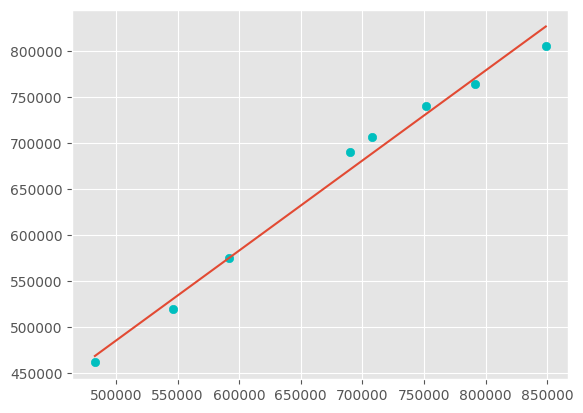

In [4]:
plt.style.use('ggplot')
plt.scatter(Primas, Siniestros, color='c')
x = np.linspace(min(Primas),max(Primas),500)
y = coef * x + intercept
plt.plot(x, y)
plt.show()